In [170]:
import numpy as np
import pylab as plt
import swyft
import torch
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
DEVICE = 'cuda:0'

In [172]:
#import logging
#logger = logging.getLogger()
#logger.setLevel(logging.DEBUG)

In [173]:
def model(v, sigma = .1):
    v = v * np.pi
    x = np.sin(v)**2
    return dict(x=x)

In [174]:
def noise(sim, v, sigma = 0.1):
    x = sim['x']
    x = x + np.random.randn(*x.shape) * sigma
    return dict(x=x)

In [175]:
zdim=10
v0 = np.ones(zdim)*0.25
obs0=model(v0)

In [176]:
prior = swyft.Prior.from_uv(lambda u: u, zdim)

In [ ]:
sim = swyft.Simulator(model, sim_shapes = dict(x=(zdim,)))
store = swyft.MemoryStore(zdim, simulator = sim)

In [ ]:
dataset = swyft.Dataset(10000, prior, store, simhook = noise)
dataset.simulate()

In [ ]:
post = swyft.Posteriors(dataset)
post.infer([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device = 'cuda')

In [ ]:
post.infer([(0, 1)], device = DEVICE)

In [199]:
samples = post.sample(100000, obs0)

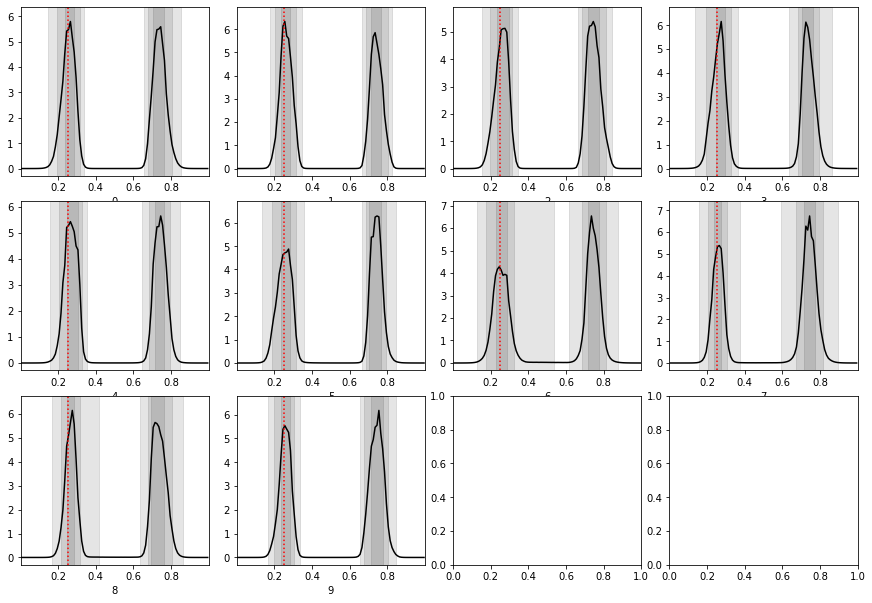

In [200]:
swyft.plot1d(samples, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ncol = 4, truth = v0)

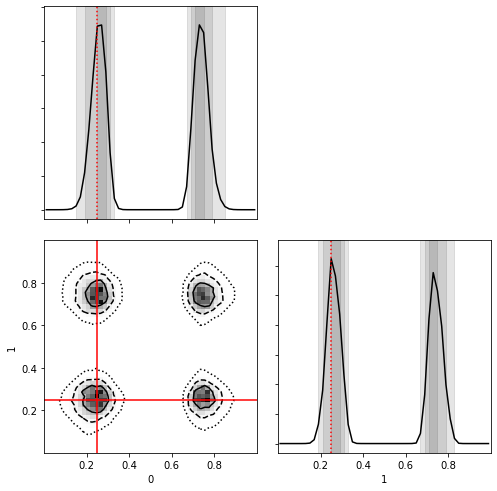

In [201]:
swyft.corner(samples, [0, 1], color='k', figsize = (8,8), truth=v0, bins=50)